***

*Course:* [Math 444](https://people.math.wisc.edu/~hlyu36/GNiDS/) - Graphs and Networks in Data Science (MMiDS) - Spring 2025

*Author:* [Hanbaek Lyu](https://hanbaeklyu.com), Department of Mathematics, University of Wisconsin-Madison  

***

In [12]:
### Load some packages 

import networkx as nx # for handling graphs/networks 
import numpy as np # for basic scientific computing 
import matplotlib.pyplot as plt # for plotting
import matplotlib.gridspec as gridspec

# Example 1 (Erdos-Renyi random graph)

In [21]:
n = 100
p = 1

G = nx.erdos_renyi_graph(n=100,p=0.01)

In [22]:
# Print out the number of nodes and edges in G

print("Number of nodes:", len(list(G.nodes())))
print("Number of edges:", len(list(G.edges())))
G0 = G.subgraph(sorted(nx.connected_components(G), key=len, reverse=True)[0])

Number of nodes: 100
Number of edges: 4950


/var/folders/0c/0z7vdgm924n7cfct5sbdp4nc0000gr/T/ipykernel_8659/4222269023.py:1: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  A = nx.adjacency_matrix(G)


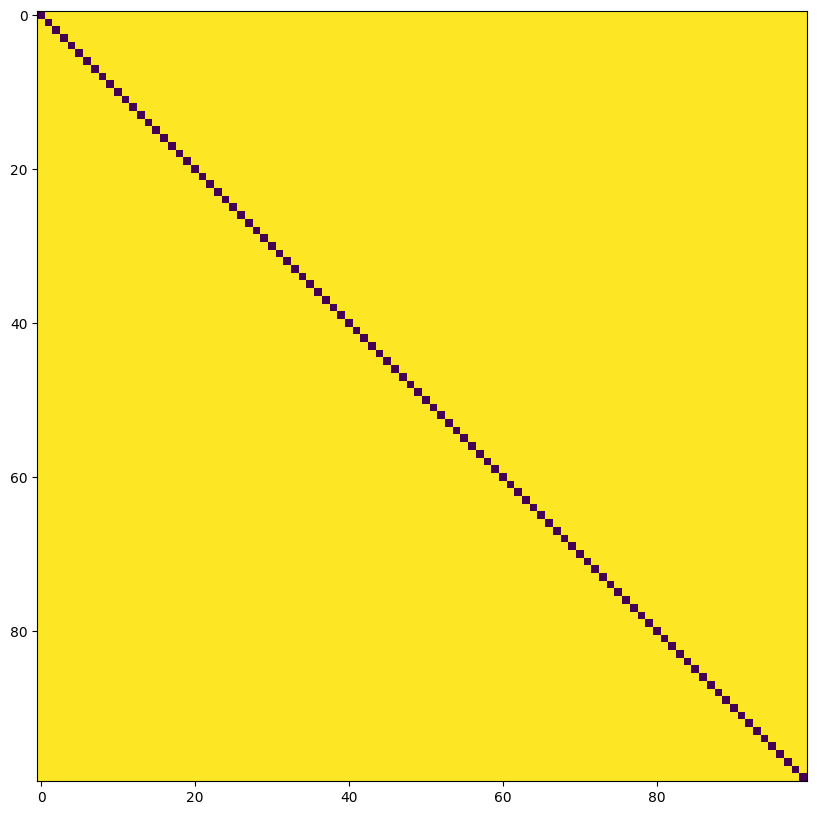

In [23]:
A = nx.adjacency_matrix(G)
fig = plt.figure(figsize=[10,10], constrained_layout=False)
ax = fig.add_subplot()
ax.imshow(A.todense());
plt.savefig("coronavirus_adj.pdf")

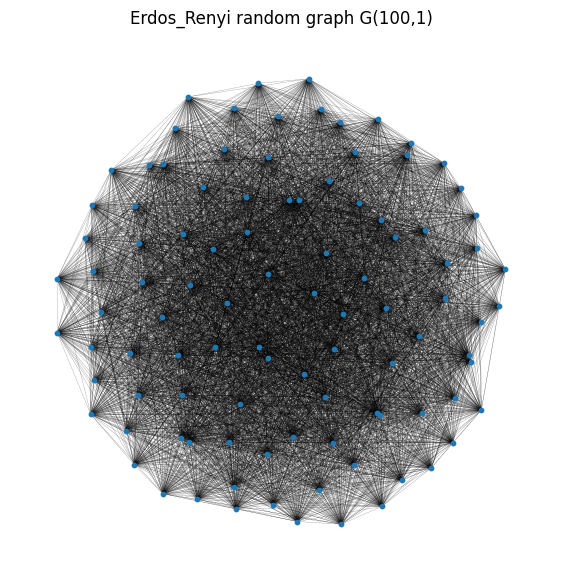

In [24]:
# Plot the full graph 

fig = plt.figure(figsize=[7,7], constrained_layout=False)
ax = fig.add_subplot()
pos = nx.spring_layout(G, seed=1)
edges = G.edges()
weights = [0.1 for u,v in G.edges]
nx.draw(G, with_labels=False, width=weights, node_size=10, ax=ax, label='Graph', pos=pos)
plt.title("Erdos_Renyi random graph G({},{})".format(n,p))
plt.savefig("ER_{}_{}.png".format(n,p), bbox_inches="tight", transparent=True)

In [55]:
n = 100
p= 0.01

G = ER_custom(n=n, p=p)
    

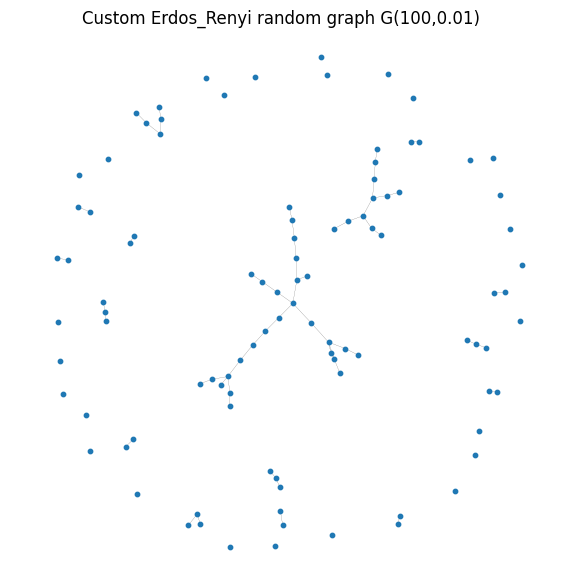

In [56]:
# Plot the full graph 

fig = plt.figure(figsize=[7,7], constrained_layout=False)
ax = fig.add_subplot()
pos = nx.spring_layout(G, seed=1)
edges = G.edges()
weights = [0.1 for u,v in G.edges]
nx.draw(G, with_labels=False, width=weights, node_size=10, ax=ax, label='Graph', pos=pos)
plt.title("Custom Erdos_Renyi random graph G({},{})".format(n,p))
plt.savefig("ER_{}_{}.png".format(n,p), bbox_inches="tight", transparent=True)

## ER graph from scratch

In [41]:
def ER_custom(n=10, p=0.1):
    # Generate an ER graph with n nodes and edge probability p
    G = nx.Graph()
    
    # Add n nodes:
    for i in np.arange(n):
        G.add_node(i)
    
    # Add edges: 
    for i in np.arange(n): 
        for j in np.arange(i+1, n): 
            # with probability p, add an edge (i,j) to G
            U = np.random.rand()
            if U < p: 
                G.add_edge(i,j)
    return G

# Example 2 (Sparse Erdos-Renyi random graph)

In [6]:
n = 100
c = 0.5




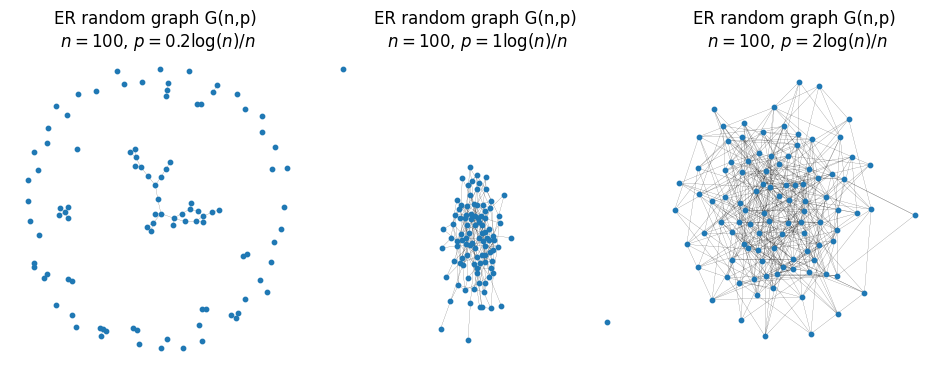

In [7]:

# Plot the full graph 
c_list = [0.2, 1, 2]
fig = plt.figure(figsize=[12,4], constrained_layout=False)
outer_grid = gridspec.GridSpec(nrows=1, ncols=len(c_list), wspace=0.1, hspace=0.4)

for i in np.arange(len(c_list)): 
    c = c_list[i]
    ax = plt.Subplot(fig, outer_grid[0,i])
    ax.set_title(r"ER random graph G(n,p)" + "\n $n=${}, $p=${}$\log(n)/n$".format(n,c))
    ax.axis('off')
    fig.add_subplot(ax)
    
    inner_grid = outer_grid[0,i].subgridspec(1, 1, wspace=0.01, hspace=0.01)
    ax = fig.add_subplot(inner_grid[0, 0])
    G = nx.erdos_renyi_graph(n=n,p= c*np.log(n)/n)
    pos = nx.spring_layout(G, seed=1)
    edges = G.edges()
    weights = [0.1 for u,v in G.edges]
    nx.draw(G, with_labels=False, width=weights, node_size=10, ax=ax, label='Graph', pos=pos)

plt.savefig("ER_examples.png", bbox_inches="tight", transparent=True)

# Example 3 (Fitting )

In [39]:
# Initialize graph 
G = nx.Graph()

In [40]:
# Load COVID_PPI.txt edgelist
path = "../Data/Caltech36.txt"
edgelist = list(np.genfromtxt(path, delimiter=",", dtype=str)) # Edit this line

In [41]:
# Add in all edges in the edgelist to G

for e in edgelist:
    G.add_edge(e[0], e[1]) # Edit this line 

In [42]:
# Print out the number of nodes and edges in G

print("Number of nodes:", len(list(G.nodes())))
print("Number of edges:", len(list(G.edges())))
print("edge density:", nx.density(G))
G0 = G.subgraph(sorted(nx.connected_components(G), key=len, reverse=True)[0])

Number of nodes: 769
Number of edges: 16656
edge density: 0.05640442132639792


In [46]:
n_nodes = len(list(G.nodes()))

num_pairs = n_nodes*(n_nodes-1)/2

edge_density = len(list(G.edges()))/num_pairs

print("edge density (custom):", edge_density)

edge density (custom): 0.05640442132639792


Text(0.5, 1.0, 'Caltech Facebook Network')

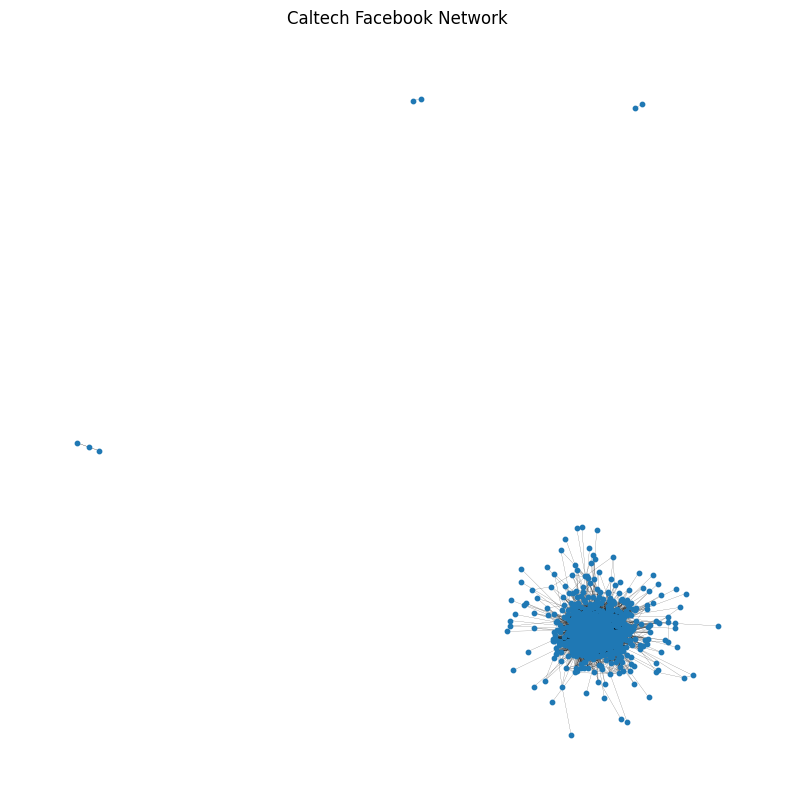

In [47]:
# Plot the full graph 

fig = plt.figure(figsize=[10,10], constrained_layout=False)
ax = fig.add_subplot()
pos = nx.spring_layout(G, seed=1)
edges = G.edges()
weights = [0.1 for u,v in G.edges]
nx.draw(G, with_labels=False, width=weights, node_size=10, ax=ax, label='Graph', pos=pos)
plt.savefig("Caltech.png", bbox_inches="tight", transparent=True)
plt.title("Caltech Facebook Network")

In [51]:
# Compute the number of connected compoenents

n_cc = len(sorted(nx.connected_components(G), key=len, reverse=True)) 
print("Number of connected components in G:", n_cc) # Verify the result with the plot above 

Number of connected components in G: 4


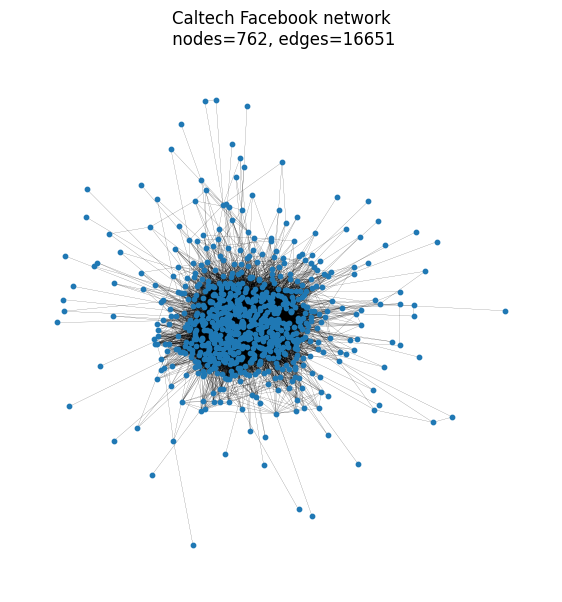

In [52]:
# Plot only the largest connected component 

G0 = G.subgraph(sorted(nx.connected_components(G), key=len, reverse=True)[0])

fig = plt.figure(figsize=[7,7], constrained_layout=False)
ax = fig.add_subplot()
pos = nx.spring_layout(G, seed=1)
edges = G0.edges()
weights = [0.1 for u,v in G.edges]
nx.draw(G0, with_labels=False, width=weights, node_size=10, ax=ax, label='Graph', pos=pos)
#plt.title("The largest connected component in the Caltech Facebook network")
plt.title("Caltech Facebook network" + "\n nodes={}, edges={}".format(len(G0.nodes()), len(G0.edges())))
plt.savefig("Caltech_connected.png", bbox_inches="tight", transparent=True)

In [53]:
n = len(G0.nodes())
p = nx.density(G0)

G_er = nx.erdos_renyi_graph(n=n,p=p)
print("Number of nodes:", len(list(G_er.nodes())))
print("Number of edges:", len(list(G_er.edges())))
print("edge density:", nx.density(G_er))

Number of nodes: 762
Number of edges: 16463
edge density: 0.056780517415612144


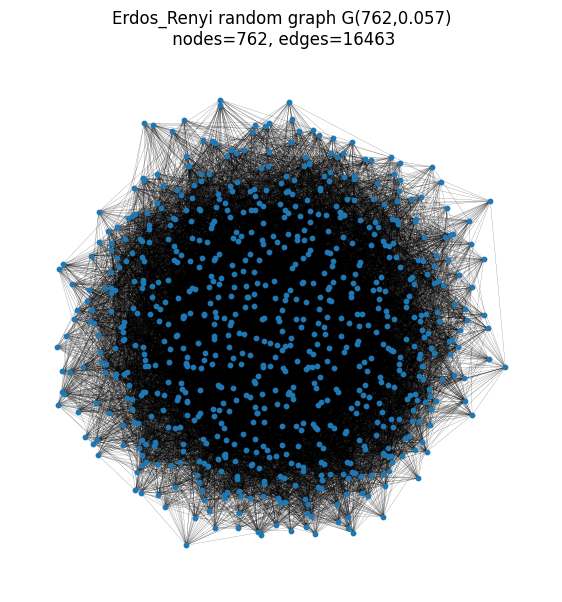

In [54]:
# Plot the full graph 

fig = plt.figure(figsize=[7,7], constrained_layout=False)
ax = fig.add_subplot()
pos = nx.spring_layout(G_er, seed=1)
edges = G_er.edges()
weights = [0.1 for u,v in G_er.edges]
nx.draw(G_er, with_labels=False, width=weights, node_size=10, ax=ax, label='Graph', pos=pos)
plt.title("Erdos_Renyi random graph G({},{})".format(n,np.round(p,3))+ "\n nodes={}, edges={}".format(len(G_er.nodes()), len(G_er.edges())))
plt.savefig("ER_{}_{}.png".format(n,np.round(p,3)), bbox_inches="tight", transparent=True)

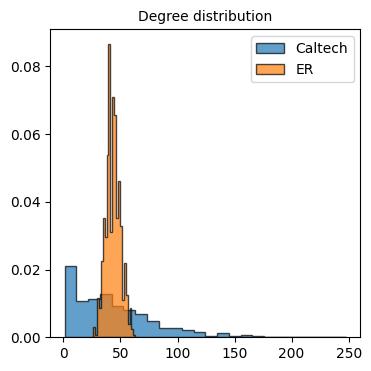

In [55]:
fig = plt.figure(figsize=[4,4], constrained_layout=False)
network_list = [""]
outer_grid = gridspec.GridSpec(nrows=1, ncols=1, wspace=0.1, hspace=0.2)
inner_grid = outer_grid[0,0].subgridspec(1, 1, wspace=0, hspace=0)
ax = fig.add_subplot(inner_grid[0, 0])
degrees_caltech = [G0.degree(n) for n in G0.nodes()]
degrees_er = [G_er.degree(n) for n in G_er.nodes()]

ax.hist(degrees_caltech, bins='auto', alpha=0.7, label='Caltech', edgecolor="k", histtype='stepfilled', density=True)
ax.hist(degrees_er, bins='auto', alpha=0.7, label='ER', edgecolor="k", histtype='stepfilled', density=True)
ax.legend()
ax.set_title("Degree distribution", fontsize=10)
plt.savefig("Caltech_ER_deg_dist")

# Expected degree distribution of ER graphs 

In [18]:
n = 1000
p = 0.1
n_trials = 50

G_er = nx.erdos_renyi_graph(n=n,p=p)
print("Number of nodes:", len(list(G_er.nodes())))
print("Number of edges:", len(list(G_er.edges())))
print("edge density:", nx.density(G_er))

Number of nodes: 1000
Number of edges: 50082
edge density: 0.10026426426426427


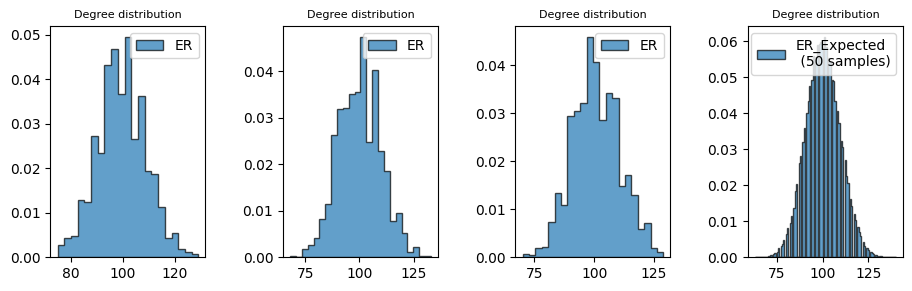

In [19]:
fig = plt.figure(figsize=[11,3], constrained_layout=False)
network_list = [""]
n_samples_display = 3
outer_grid = gridspec.GridSpec(nrows=1, ncols=n_samples_display+1, wspace=0.5, hspace=0)

degs_list = []

for i in np.arange(n_trials): 
    G_er = nx.erdos_renyi_graph(n=n,p=p)
    degrees_er = [G_er.degree(n) for n in G_er.nodes()]
    degs_list = degs_list + degrees_er 
    if i < n_samples_display:
        inner_grid = outer_grid[0,i].subgridspec(1, 1, wspace=0, hspace=0)
        ax = fig.add_subplot(inner_grid[0, 0])
        ax.hist(degrees_er, bins='auto', alpha=0.7, label='ER', edgecolor="k", histtype='stepfilled', density=True)
        ax.legend()
        ax.set_title("Degree distribution", fontsize=8)
    
inner_grid = outer_grid[0,-1].subgridspec(1, 1, wspace=0, hspace=0)
ax = fig.add_subplot(inner_grid[0, 0])
ax.hist(degs_list, bins='auto', alpha=0.7, label='ER_Expected' + "\n ({} samples)".format(n_trials) , edgecolor="k", 
        histtype='stepfilled', density=True, linewidth=1)
ax.legend()
ax.set_title("Degree distribution", fontsize=8)

plt.savefig("ER_deg_dist")

# Watts-Strogatz model

In [13]:
def random_orientation(G): 
    # G is undirected. Flip fair coins for each edge of G to get initial orientation.
    G_di = nx.DiGraph() 
    for e in G.edges():
        U = np.random.rand()
        if U < 1/2: 
            G_di.add_edge(e[0],e[1])
        else:
            G_di.add_edge(e[1],e[0])
    return G_di

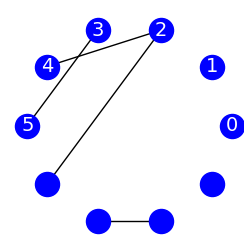

In [58]:
G = nx.erdos_renyi_graph(n=10,p=0.2)

fig = plt.figure(figsize=[3,3], constrained_layout=False)
ax = fig.add_subplot()
nx.draw_networkx(G, ax=ax, pos=nx.circular_layout(G), labels={i: i for i in range(6)},
                 node_size=300, node_color="blue", font_size=14, font_color="white")
plt.axis('off');

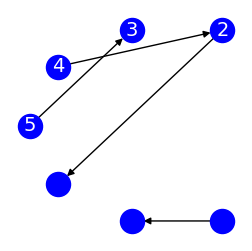

In [61]:
G_di = random_orientation(G)

fig = plt.figure(figsize=[3,3], constrained_layout=False)
ax = fig.add_subplot()
nx.draw_networkx(G_di, ax=ax, pos=nx.circular_layout(G), labels={i: i for i in range(6)},
                 node_size=300, node_color="blue", font_size=14, font_color="white")
plt.axis('off');

In [62]:
def WS(G, p=0.1, random_orientation=False):
    # Watts-Strogatz model with baseline graph G and edge rewiring probability p 
    # G is undirected. Flip fair coins for each edge of G to get initial orientation.
    # For each oriented edge, resample the head node uniformly at random with probability p, independently. 
    # Do nothing for that edge with probability 1-p. 
    
    # Give random orientation on the edges 
    if random_orientation: 
        G1 = random_orientation(G)
    else: #G is already a digraph 
        G1 = G

    nodes = list(G1.nodes())
    G2 = nx.Graph()
    
    for e in G1.edges():
        U = np.random.rand()
        if U < p: 
            i = np.random.choice(np.arange(len(nodes)))
            v = nodes[i]
            G2.add_edge(e[0],v)
        else: 
            G2.add_edge(e[0],e[1])
    return G2
    

## WS with circulant baseline graph 

In [63]:
G0 = nx.circulant_graph(20, [1,2])

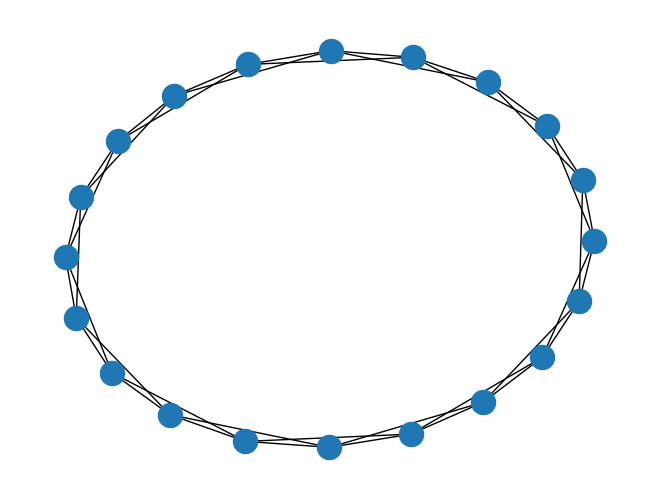

In [64]:
nx.draw(G0)

In [65]:
G1 = random_orientation(G0)

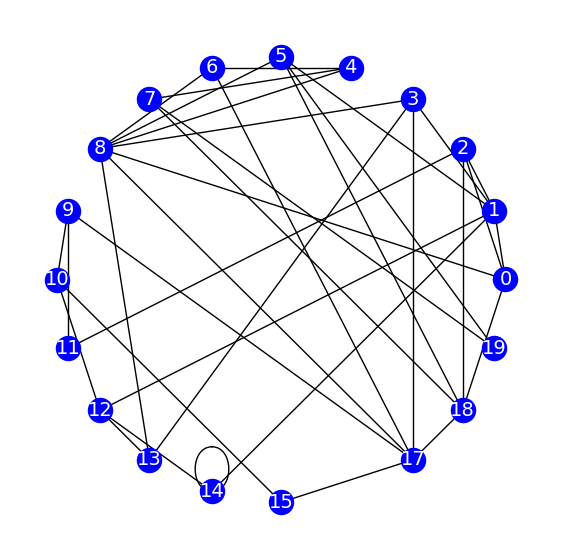

In [67]:
G_WS = WS(G1,p=0.7)

fig = plt.figure(figsize=[7,7], constrained_layout=False)
ax = fig.add_subplot()
nx.draw_networkx(G_WS, ax=ax, pos=nx.circular_layout(G0), 
                 node_size=300, node_color="blue", font_size=14, font_color="white")
plt.axis('off');

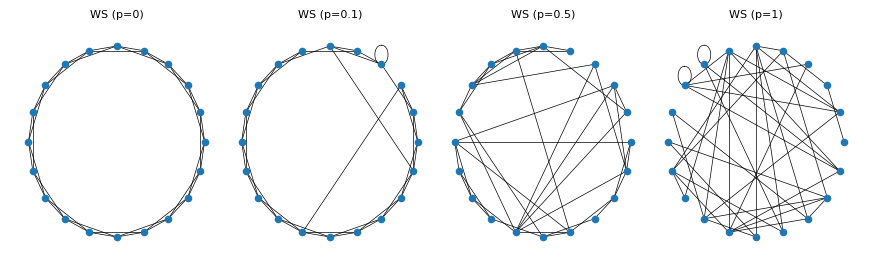

In [68]:
fig = plt.figure(figsize=[11,3], constrained_layout=False)
network_list = [""]
p_list=[0, 0.1, 0.5, 1]
outer_grid = gridspec.GridSpec(nrows=1, ncols=len(p_list), wspace=0, hspace=0)

G0 = nx.circulant_graph(20, [1,2])
G1 = random_orientation(G0)
pos = nx.circular_layout(G0)
clustering_list = [] 
path_length_list = []

for i in np.arange(len(p_list)): 
    G = WS(G1, p=p_list[i], random_orientation=False)
    #degrees = [G.degree(n) for n in G.nodes()]
    #clustering_list.append(nx.average_clustering(G))
    #path_length_list.append(nx.average_shortest_path_length(G))
    
    inner_grid = outer_grid[0,i].subgridspec(1, 1, wspace=0, hspace=0)
    ax = fig.add_subplot(inner_grid[0, 0])
    edges = G.edges()
    weights = [0.5 for u,v in G.edges]
    nx.draw(G, with_labels=False, width=weights, node_size=20, ax=ax, label='Graph', pos=pos)
    #ax.legend()
    ax.set_title("WS (p={})".format(p_list[i]), fontsize=8)

plt.savefig("WS_graph")

## WS with lattice baseline graph

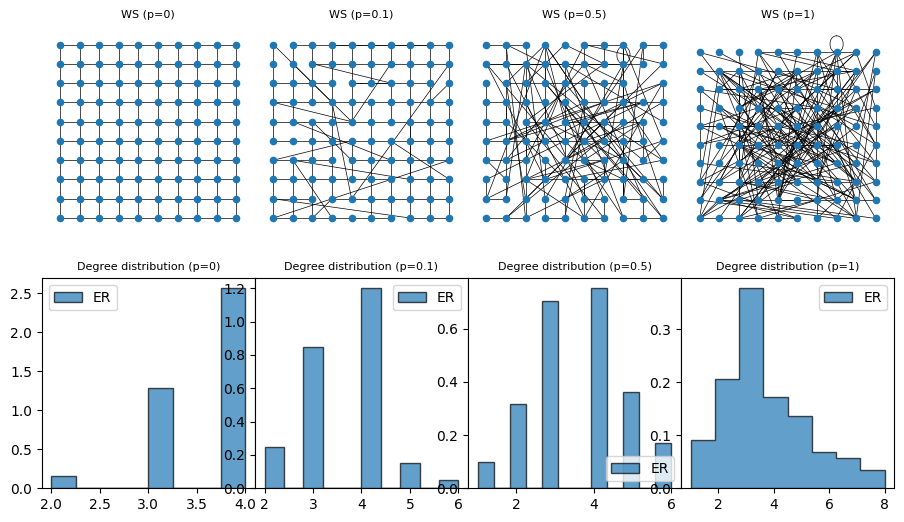

In [69]:
fig = plt.figure(figsize=[11,6], constrained_layout=False)
network_list = [""]
p_list=[0, 0.1, 0.5, 1]
outer_grid = gridspec.GridSpec(nrows=2, ncols=len(p_list), wspace=0, hspace=0.2)

G0 = nx.grid_2d_graph(10,10)
G1 = random_orientation(G0)
#pos = nx.spectral_layout(G0)
pos = {(x,y):(y,-x) for x,y in G0.nodes()}
clustering_list = [] 
path_length_list = []

for i in np.arange(len(p_list)): 
    G = WS(G1, p=p_list[i], random_orientation=False)
    degrees = [G.degree(n) for n in G.nodes()]
    
    inner_grid = outer_grid[0,i].subgridspec(1, 1, wspace=0, hspace=0)
    ax = fig.add_subplot(inner_grid[0, 0])
    edges = G.edges()
    weights = [0.5 for u,v in G.edges]
    nx.draw(G, with_labels=False, width=weights, node_size=20, ax=ax, label='Graph', pos=pos)
    #ax.legend()
    ax.set_title("WS (p={})".format(p_list[i]), fontsize=8)

    
    inner_grid1 = outer_grid[1,i].subgridspec(1, 1, wspace=0, hspace=0)
    ax = fig.add_subplot(inner_grid1[0, 0])
    ax.hist(degrees, bins='auto', alpha=0.7, label='ER', edgecolor="k", histtype='stepfilled', density=True)
    ax.legend()
    ax.set_title("Degree distribution (p={})".format(p_list[i]), fontsize=8)


plt.savefig("WS_graph_lattice_deg", bbox_inches="tight")

## Plot degree distribution vs. p

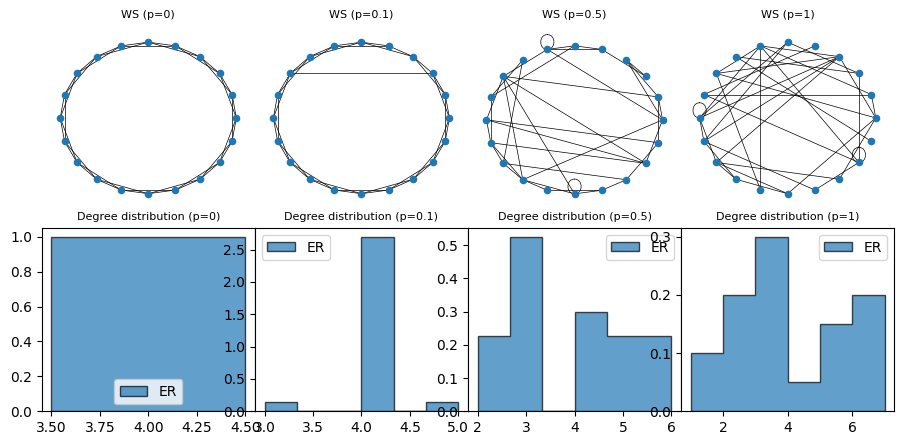

In [70]:
fig = plt.figure(figsize=[11,5], constrained_layout=False)
network_list = [""]
p_list=[0, 0.1, 0.5, 1]
outer_grid = gridspec.GridSpec(nrows=2, ncols=len(p_list), wspace=0, hspace=0.1)

G0 = nx.circulant_graph(20, [1,2])
G1 = random_orientation(G0)
pos = nx.circular_layout(G0)
clustering_list = [] 
path_length_list = []

for i in np.arange(len(p_list)): 
    G = WS(G1, p=p_list[i], random_orientation=False)
    degrees = [G.degree(n) for n in G.nodes()]
    
    inner_grid = outer_grid[0,i].subgridspec(1, 1, wspace=0, hspace=0)
    ax = fig.add_subplot(inner_grid[0, 0])
    edges = G.edges()
    weights = [0.5 for u,v in G.edges]
    nx.draw(G, with_labels=False, width=weights, node_size=20, ax=ax, label='Graph', pos=pos)
    #ax.legend()
    ax.set_title("WS (p={})".format(p_list[i]), fontsize=8)

    
    inner_grid1 = outer_grid[1,i].subgridspec(1, 1, wspace=0, hspace=0)
    ax = fig.add_subplot(inner_grid1[0, 0])
    ax.hist(degrees, bins='auto', alpha=0.7, label='ER', edgecolor="k", histtype='stepfilled', density=True)
    ax.legend()
    ax.set_title("Degree distribution (p={})".format(p_list[i]), fontsize=8)


plt.savefig("WS_graph_deg", bbox_inches="tight")

## Plot average clustering coefficient and avg shortest path length vs. p

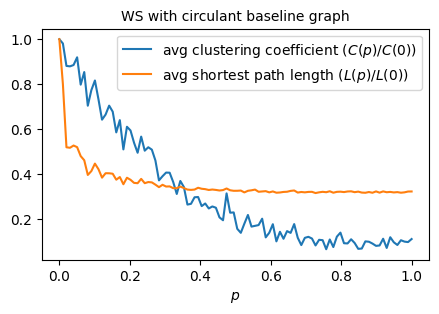

In [71]:
fig = plt.figure(figsize=[5,3], constrained_layout=False)
network_list = [""]
p_list=np.linspace(0, 1, 100, endpoint=True)
outer_grid = gridspec.GridSpec(nrows=1, ncols=1, wspace=0, hspace=0)
inner_grid = outer_grid[0,0].subgridspec(1, 1, wspace=0, hspace=0)
ax = fig.add_subplot(inner_grid[0, 0])

G0 = nx.circulant_graph(100, [1,2,3])
G1 = random_orientation(G0)
pos = nx.circular_layout(G0)
clustering_list = [] 
path_length_list = []

for i in np.arange(len(p_list)): 
    G = WS(G1, p=p_list[i], random_orientation=False)
    #degrees = [G.degree(n) for n in G.nodes()]
    clustering_list.append(nx.average_clustering(G))
    if nx.is_connected(G):
        path_length_list.append(nx.average_shortest_path_length(G))
    else:
        path_length_list.append(0)
    
clustering_list = np.asarray(clustering_list)/clustering_list[0]    
path_length_list = np.asarray(path_length_list)/path_length_list[0]
    
ax.plot(p_list, clustering_list, label=r"avg clustering coefficient ($C(p)/C(0)$)")
ax.plot(p_list, path_length_list, label=r"avg shortest path length ($L(p)/L(0)$)")
#ax.set_xscale('log')
ax.set_title("WS with circulant baseline graph", fontsize=10)
ax.set_xlabel(r"$p$")
ax.legend()



plt.savefig("WS_cl_pl", bbox_inches="tight")

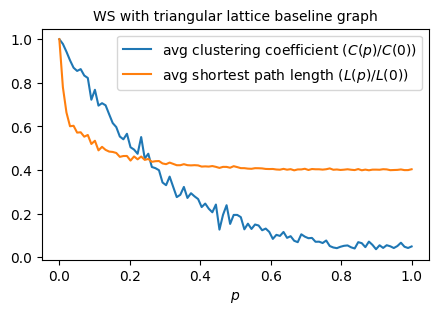

In [25]:
fig = plt.figure(figsize=[5,3], constrained_layout=False)
network_list = [""]
p_list=np.linspace(0, 1, 100, endpoint=True)
outer_grid = gridspec.GridSpec(nrows=1, ncols=1, wspace=0, hspace=0)
inner_grid = outer_grid[0,0].subgridspec(1, 1, wspace=0, hspace=0)
ax = fig.add_subplot(inner_grid[0, 0])

#G0 = nx.grid_2d_graph(10,10)
G0 = nx.triangular_lattice_graph(20, 20)
G1 = random_orientation(G0)
pos = nx.circular_layout(G0)
clustering_list = [] 
path_length_list = []

for i in np.arange(len(p_list)): 
    G = WS(G1, p=p_list[i], random_orientation=False)
    #degrees = [G.degree(n) for n in G.nodes()]
    clustering_list.append(nx.average_clustering(G))
    if nx.is_connected(G):
        path_length_list.append(nx.average_shortest_path_length(G))
    else:
        path_length_list.append(0)
    
clustering_list = np.asarray(clustering_list)/clustering_list[0]    
path_length_list = np.asarray(path_length_list)/path_length_list[0]
    
ax.plot(p_list, clustering_list, label=r"avg clustering coefficient ($C(p)/C(0)$)")
ax.plot(p_list, path_length_list, label=r"avg shortest path length ($L(p)/L(0)$)")
#ax.set_xscale('log')
ax.set_title("WS with triangular lattice baseline graph", fontsize=10)
ax.set_xlabel(r"$p$")
ax.legend()



plt.savefig("WS_cl_pl_triangular", bbox_inches="tight")